<a href="https://colab.research.google.com/github/miruthunjaya/CODSOFT/blob/INTERNSHIP/TASK4_CODSOFT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**TASK-4 :   SALES PREDICTION USING PYTHON**
---
**BATCH :**  DEC Batch A23

**DOMAIN :** DATA SCIENCE

**AIM :**    To build a model which predicts sales based on the money spent on different platforms for marketing.

**ABOUT DATASET**

The advertising dataset captures the sales revenue generated with respect to advertisement costs across multiple channels like radio, tv, and newspapers. It is required to understand the impact of ad budgets on the overall sales.

It consists of the following columns:
         
* TV
* Radio
* Newspaper
* Sales

The Advertising dataset is available in Kaggle as
https://www.kaggle.com/datasets/ashydv/advertising-dataset

#Importing Libraries


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import io
import warnings
warnings.filterwarnings('ignore')

#Loading Datasets

In [ ]:
#uploading the dataset
from google.colab import files
uploaded = files.upload()

Saving advertising.csv to advertising.csv


In [ ]:
#reading the dataset
df = pd.read_csv(io.BytesIO(uploaded['advertising.csv']))

# Data Inspection

In [ ]:
# Check information about the dataset, data types, and missing values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [ ]:
#Get statistical summary of the numerical coumns
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
Radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
Newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
Sales,200.0,15.1305,5.283892,1.6,11.000,16.00,19.050,27.0


In [ ]:
# Get the shape of the dataset
print(f'''No. of rows: {df.shape[0]}
No. of columns: {df.shape[1]}''')

No. of rows: 200
No. of columns: 4


In [ ]:
df.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [ ]:
df.tail(10)

,TV,Radio,Newspaper,Sales
190,39.5,41.1,5.8,10.8
191,75.5,10.8,6.0,11.9
192,17.2,4.1,31.6,5.9
193,166.8,42.0,3.6,19.6
194,149.7,35.6,6.0,17.3
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,14.0
197,177.0,9.3,6.4,14.8
198,283.6,42.0,66.2,25.5
199,232.1,8.6,8.7,18.4


In [ ]:
df.iloc[:, 0:-1]

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [ ]:
df.iloc[:, -1]

0      22.1
1      10.4
2      12.0
3      16.5
4      17.9
       ... 
195     7.6
196    14.0
197    14.8
198    25.5
199    18.4
Name: Sales, Length: 200, dtype: float64

#Data Cleaning

In [ ]:
# Checking Null values
df.isnull().sum()*100/df.shape[0]

TV           0.0
Radio        0.0
Newspaper    0.0
Sales        0.0
dtype: float64

There are no NULL values in the dataset, hence it is clean.

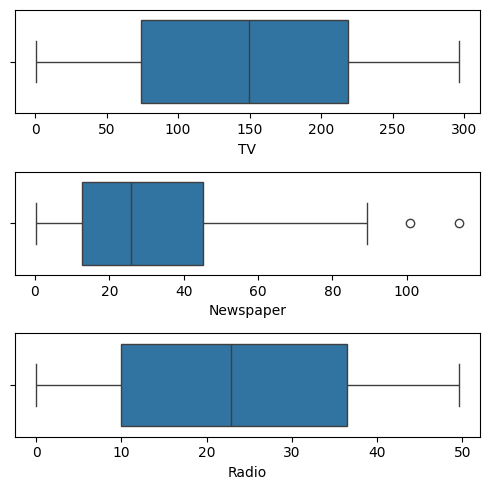

In [ ]:
# Outlier Analysis
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(x=df['TV'], ax = axs[0])
plt2 = sns.boxplot(x=df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(x=df['Radio'], ax = axs[2])
plt.tight_layout()

There are no considerable outliers present in the data.

#Univariate Analysis

Sales (Target Variable)

In [ ]:
df['Sales'].value_counts()

11.9    5
16.7    5
20.7    4
11.0    3
11.3    3
       ..
13.4    1
24.2    1
8.1     1
5.5     1
25.5    1
Name: Sales, Length: 121, dtype: int64

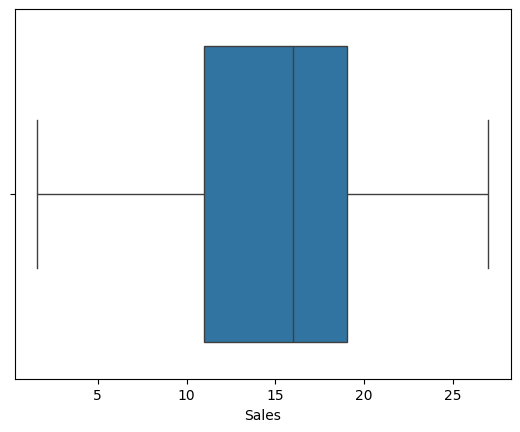

In [ ]:
sns.boxplot(x=df['Sales'])
plt.show()

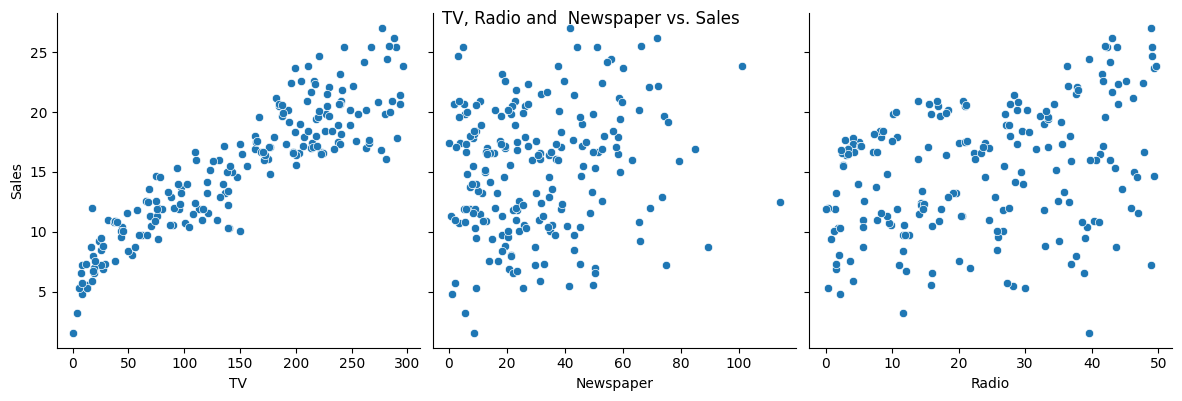

In [ ]:
# Let's see the correlation between different variables.

sns.pairplot(df, x_vars=['TV', 'Newspaper', 'Radio'], y_vars = 'Sales', height = 4, aspect=1, kind = 'scatter')
plt.suptitle("TV, Radio and  Newspaper vs. Sales")
plt.show()


In [ ]:
# Correlation among the variables
df.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


Text(0.5, 1.0, 'Correlation among the variables')

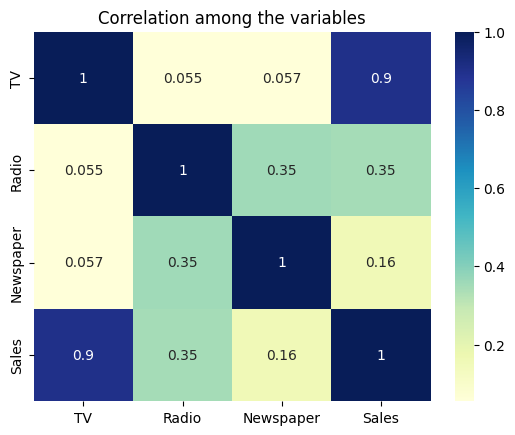

In [ ]:
# Correlation Heatmap to check for multicollinearity among independent/dependent variables

sns.heatmap(df.corr(), annot = True, cmap='YlGnBu')
plt.title('Correlation among the variables')

#Data Visualization

<Axes: xlabel='TV', ylabel='Density'>

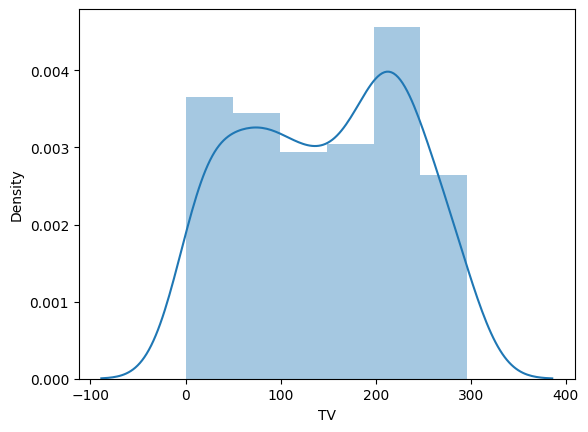

In [ ]:
sns.distplot(df['TV'])

<Axes: xlabel='Radio', ylabel='Density'>

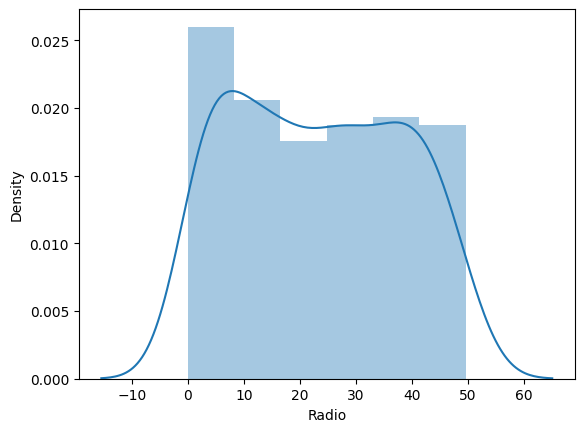

In [ ]:
sns.distplot(df['Radio'])

<Axes: xlabel='Newspaper', ylabel='Density'>

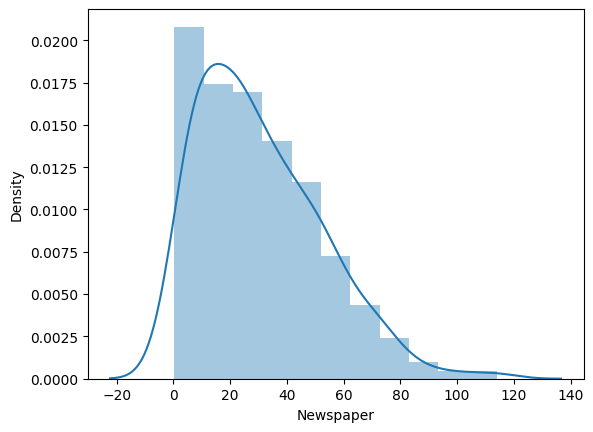

In [ ]:
sns.distplot(df['Newspaper'])

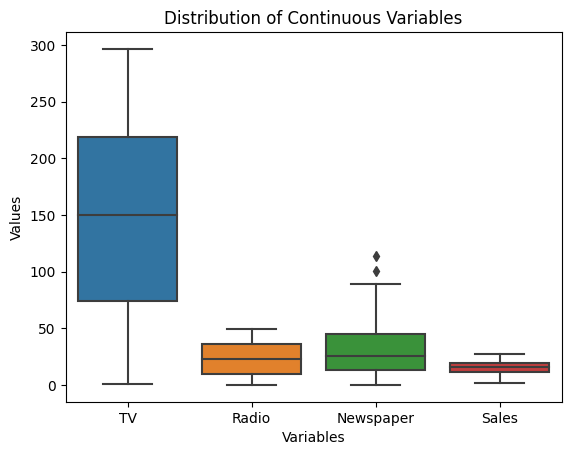

In [ ]:
# Distribution of the variables
sns.boxplot(df.melt(value_vars = df.columns), x = 'variable', y = 'value')
plt.title('Distribution of Continuous Variables')
plt.xlabel('Variables')
plt.ylabel('Values')
plt.show()

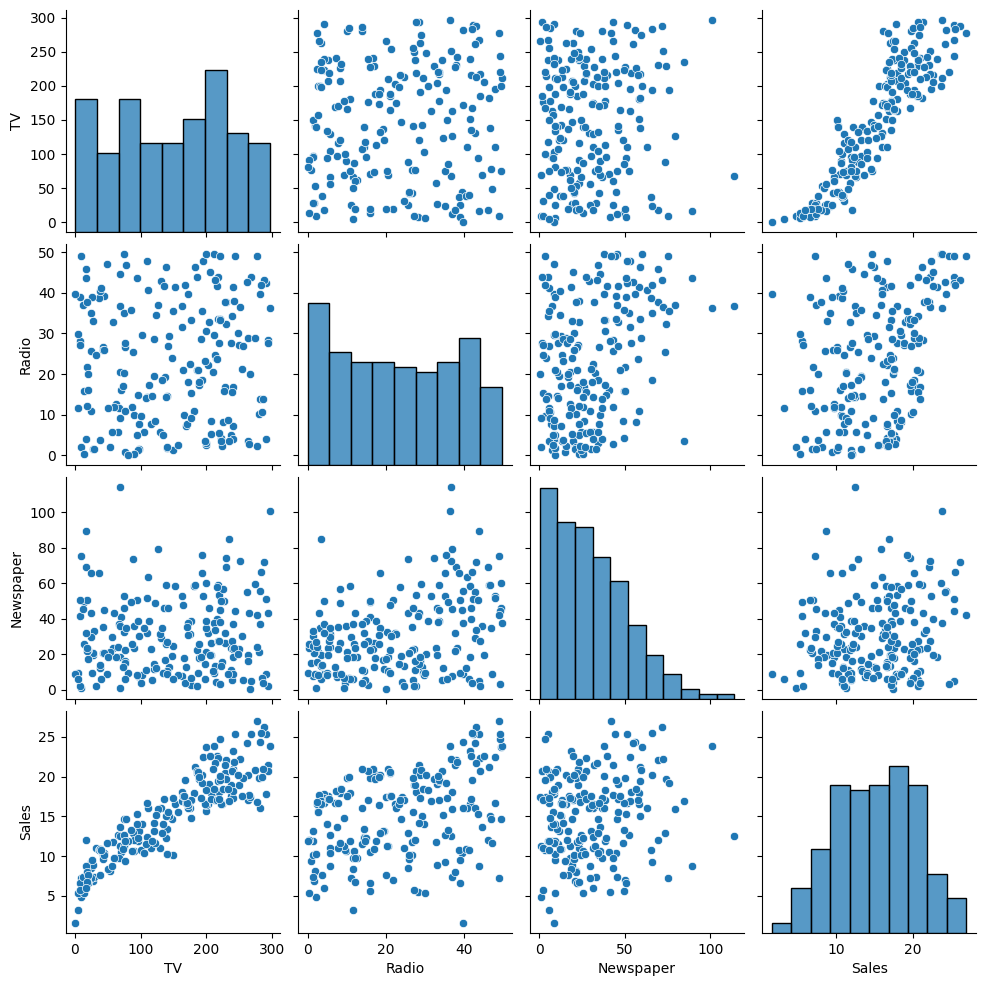

In [ ]:
sns.pairplot(data=df)
plt.show()

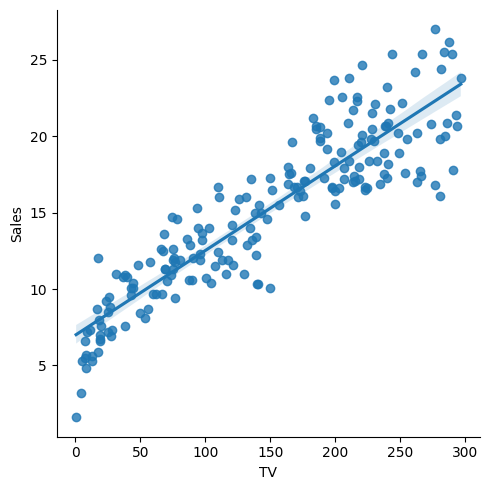

In [ ]:
sns.lmplot(x='TV', y='Sales', data=df)

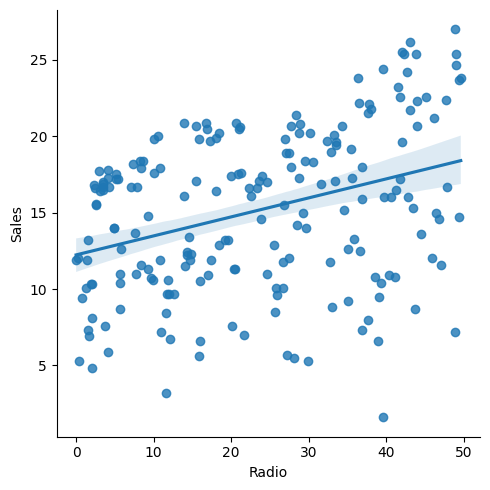

In [ ]:
sns.lmplot(x='Radio', y='Sales', data=df)

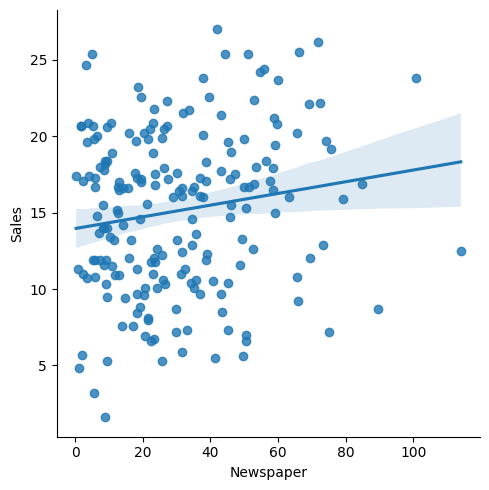

In [ ]:
sns.lmplot(x='Newspaper', y='Sales', data=df)

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

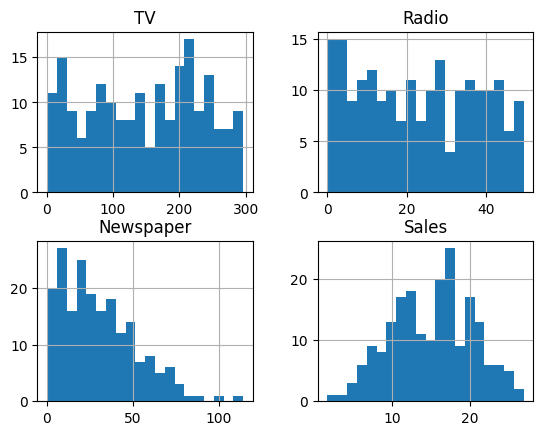

In [ ]:
# Histograms to check the normality assumption of the dependent variable (Sales)

df.hist(bins=20)

<Axes: title={'center': 'Histogram of TV advertisements costs'}, ylabel='Frequency'>

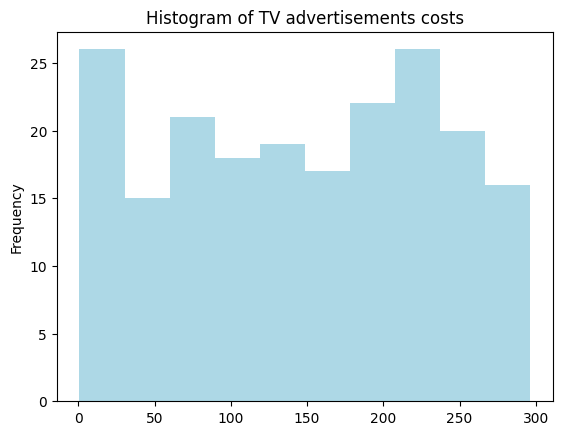

In [ ]:
df['TV'].plot.hist(bins=10, color='lightblue', title='Histogram of TV advertisements costs')

<Axes: title={'center': 'Histogram of Radio advertisements costs'}, ylabel='Frequency'>

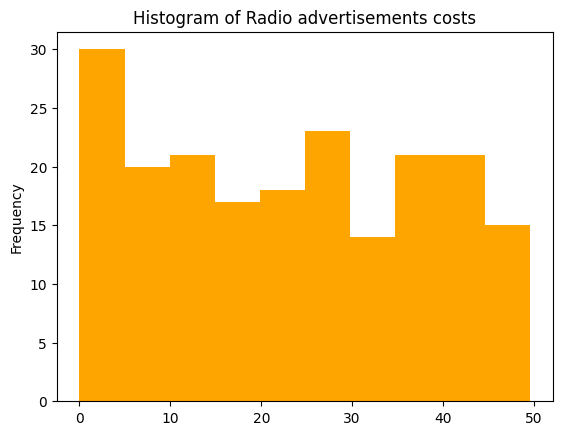

In [ ]:
df['Radio'].plot.hist(bins=10, color='orange', title='Histogram of Radio advertisements costs')

<Axes: title={'center': 'Histogram of Newspaper advertisements costs'}, ylabel='Frequency'>

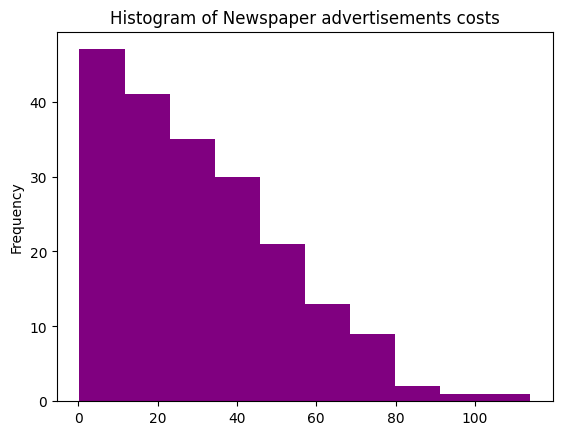

In [ ]:
df['Newspaper'].plot.hist(bins=10, color='purple', title='Histogram of Newspaper advertisements costs')

#Simple Linear Regression

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [ ]:
x = df[['TV']]
y = df['Sales']

In [ ]:
# Train Test Split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size = 0.7, test_size = 0.3, random_state = 10)

In [ ]:
x_train.shape

(140, 1)

*Our training set has 140 observations;*

In [ ]:
x_test.shape

(60, 1)

*Test set actually has 60 observations;*

In [ ]:
x_train.head()

,TV
119,19.4
110,225.8
95,163.3
167,206.8
193,166.8


In [ ]:
y_train.head()

119     6.6
110    18.4
95     16.9
167    17.2
193    19.6
Name: Sales, dtype: float64

In [ ]:
x_test

,TV
59,210.7
5,8.7
20,218.4
198,283.6
52,216.4
19,147.3
162,188.4
55,198.9
69,216.8
2,17.2


In [ ]:
y_test

59     18.4
5       7.2
20     18.0
198    25.5
52     22.6
19     14.6
162    19.9
55     23.7
69     22.3
2      12.0
98     25.4
10     12.6
75      8.7
142    20.1
124    19.7
63     14.0
109    19.8
78      5.3
111    21.8
185    22.6
154    20.6
130     1.6
61     24.2
87     16.0
102    19.8
121     7.0
136     9.5
1      10.4
47     23.2
172     7.6
159    12.9
39     21.5
76      6.9
91      7.3
35     17.8
178    16.8
127    11.9
169    20.0
46     10.6
174    16.5
190    10.8
7      13.2
26     15.0
138     9.6
58     23.8
72      8.8
103    19.7
199    18.4
56      5.5
116    12.2
24      9.7
43     17.9
101    23.8
163    18.0
21     17.5
60      8.1
175    27.0
70     18.3
90     14.0
49      9.7
Name: Sales, dtype: float64

Model Building

In [ ]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression()

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
#preprocessing
preprocess = Pipeline([('scaler', StandardScaler())])
#model
model_1 = Pipeline([('preprocess',preprocess), ('regressor', RandomForestRegressor())])
model_1.fit(x_train, y_train)

Pipeline(steps=[('preprocess', Pipeline(steps=[('scaler', StandardScaler())])),
                ('regressor', RandomForestRegressor())])

In [ ]:
#prediction
print(model.coef_)
print(model.intercept_)

[0.05338906]
7.150594888804455


In [ ]:
model.predict([[40]])

array([9.28615737])

In [ ]:
y_pred = model.predict(x_test)
y_pred

array([18.39967025,  7.61507973, 18.81076603, 22.29173287, 18.7039879 ,
       15.01480372, 17.20909417, 17.76967932, 18.72534353,  8.06888676,
       22.61740615, 10.67961189,  8.05287004, 18.92288306, 19.40338462,
       12.63365156, 20.78616132,  7.43889582, 20.05473117, 18.0953526 ,
       17.17706073,  7.18796723, 21.10115679, 13.06076405, 22.11021006,
        8.15430925,  8.51735488,  9.52640815, 19.95863086,  8.1970205 ,
       14.18193435, 19.32330102,  8.61879409,  8.67752206, 22.67079521,
       21.92334834, 11.43239766, 22.32910521, 11.93959375, 19.02432228,
        9.25946284, 13.56796014, 14.77989185,  9.44632455, 18.40500916,
        8.58142175, 17.18239964, 19.54219618,  7.54033504, 14.58235232,
       10.47673345, 18.19679181, 22.97511286, 15.87970652, 19.82515821,
       10.00690971, 21.93402615, 17.78035713, 14.32074591, 10.72232314])

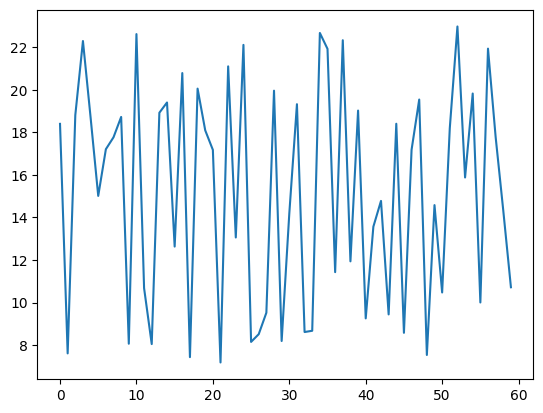

In [ ]:
plt.plot(y_pred)

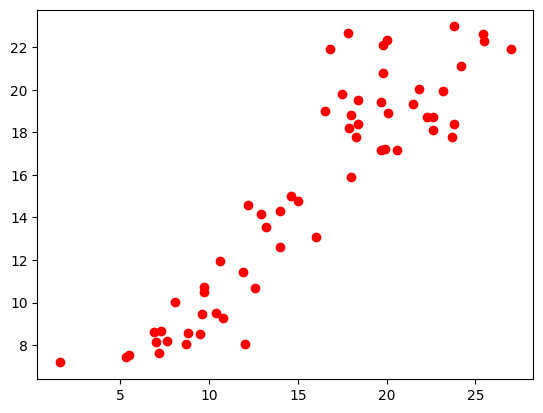

In [ ]:
plt.scatter(y_test, y_pred, c='r')

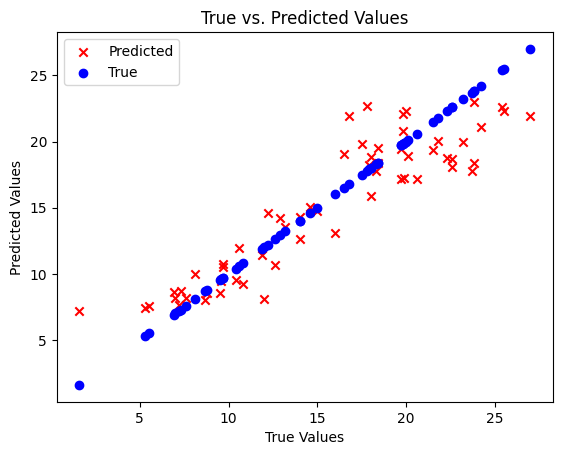

In [ ]:
plt.scatter(y_test, y_pred, c='r', label='Predicted', marker='x')
plt.scatter(y_test, y_test, c='b', label='True', marker='o') # use y_test for true values
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.title('True vs. Predicted Values')
plt.legend()
plt.show()

In [ ]:
act_predict= pd.DataFrame({'Actual': y_test.values.flatten(), 'Predict': y_pred.flatten()})
act_predict.head(5)

,Actual,Predict
0,18.4,18.399670
1,7.2,7.615080
2,18.0,18.810766
3,25.5,22.291733
4,22.6,18.703988


<Axes: >

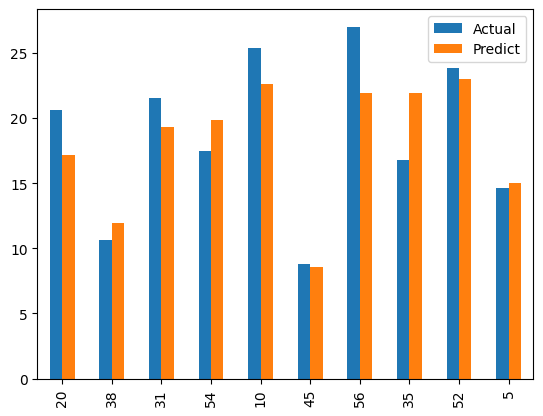

In [ ]:
act_predict.sample(10).plot(kind='bar')

Building a Linear Model

In [ ]:
import statsmodels.api as sm


In [ ]:
x_train_sm = sm.add_constant(x_train)
lr = sm.OLS(y_train, x_train_sm).fit()

In [ ]:
# Print the parameters, i.e. the intercept and the slope of the regression line fitted
lr.params

const    6.948683
TV       0.054546
dtype: float64

In [ ]:
# Different parameters of the regression line fitted
print(lr.summary())


                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.816
Model:                            OLS   Adj. R-squared:                  0.814
Method:                 Least Squares   F-statistic:                     611.2
Date:                Sun, 14 Jan 2024   Prob (F-statistic):           1.52e-52
Time:                        14:09:45   Log-Likelihood:                -321.12
No. Observations:                 140   AIC:                             646.2
Df Residuals:                     138   BIC:                             652.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          6.9487      0.385     18.068      0.0

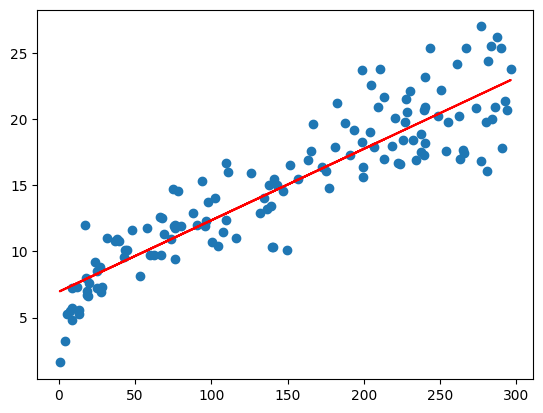

In [ ]:
plt.scatter(x_train, y_train)
plt.plot(x_train, 6.948 + 0.054*x_train, 'r')
plt.show()

Model  Evaluation

In [ ]:
model.score(x_test, y_test)

0.8288743166580128

In [ ]:
y_train_pred = lr.predict(x_train_sm)
res = (y_train - y_train_pred)

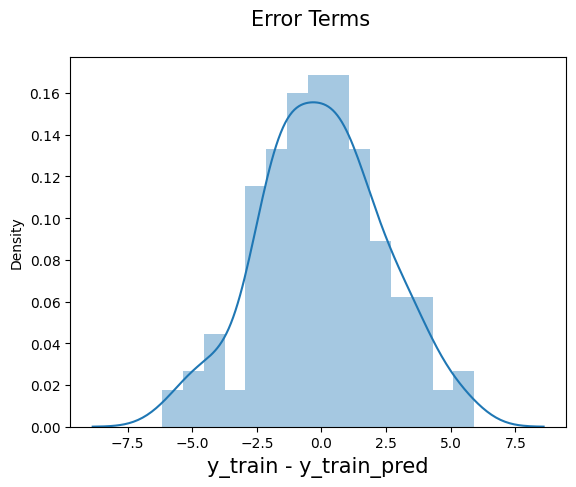

In [ ]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()

The residuals are following the normally distributed with a mean 0. All good!

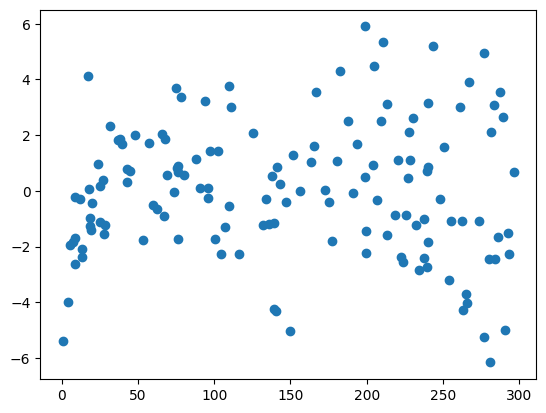

In [ ]:
#looking for patterns in the residual
plt.scatter(x_train,res)
plt.show()

In [ ]:
 #Predictions on the Test Set
x_test_sm = sm.add_constant(x_test)
y_test_pred = lr.predict(x_test_sm)

In [ ]:
y_test_pred.head()

126     7.374140
104    19.941482
99     14.323269
92     18.823294
111    20.132392
dtype: float64

#Multiple Linear Regression

In [ ]:
X = df[['TV', 'Radio', 'Newspaper']]
Y = df.Sales

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y, test_size= 0.3, random_state = 10)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.score(X_test, Y_test)

0.9032402609859365

#Check Performance on Regression Models

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

2.5425056458105137

In [ ]:
# Looking at the RMSE
np.sqrt(mean_squared_error(y_test, y_pred))

2.5425056458105137

In [ ]:
np.sqrt(mean_absolute_error(y_test, y_pred))

1.42017054384854

In [ ]:
# Checking the R-squared on the test set
r_squared = r2_score(y_test, y_pred)
r_squared

0.8288743166580128

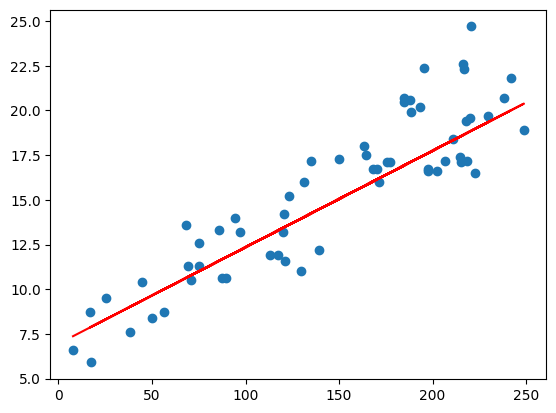

In [ ]:
# Visualizing the test on the fit set
plt.scatter(x_test, y_test)
plt.plot(x_test, 6.948 + 0.054 * x_test, 'r')
plt.show()

In [ ]:
n









..






































r